## Utilizing Convolutional Neural Networks to Predict Emotions Through Visual Cues in Facial Recognition

In [2]:
from sklearn.metrics import accuracy_score

In [3]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from data_load import convert_data

In [4]:

seed = 42
images, labels, classes, filepaths = convert_data()
Xtrain, Xval, Ytrain, Yval = train_test_split(images, labels, test_size=0.2, random_state=seed)

num_classes = len(Ytrain)


Current working directory: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression
First few rows of the CSV:
  user.id                            image   emotion
0     628  facial-expressions_2868588k.jpg     anger
1     628  facial-expressions_2868585k.jpg  surprise
2     628  facial-expressions_2868584k.jpg   disgust
3     628  facial-expressions_2868582k.jpg      fear
4   dwdii           Aaron_Eckhart_0001.jpg   neutral

Sample filepaths in DataFrame:
  Image: facial-expressions_2868588k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868588k.jpg
  Image: facial-expressions_2868585k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868585k.jpg
  Image: facial-expressions_2868584k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868584k.jpg

Encoded emotion

Training data shape: (10212, 50, 50, 1)
Evaluation data shape: (2553, 50, 50, 1)


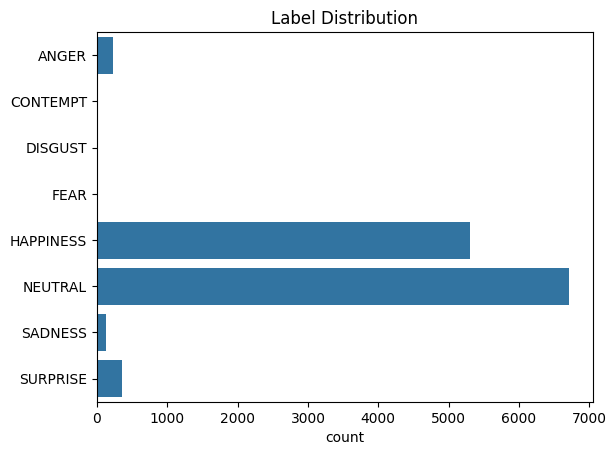

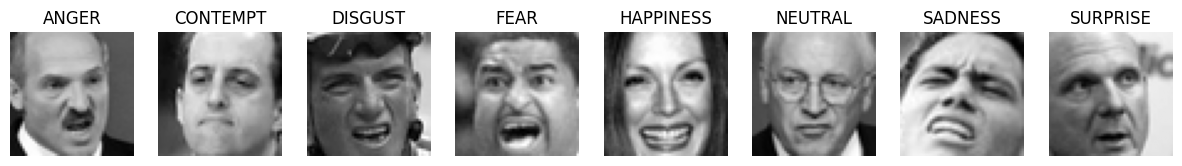

In [16]:
import seaborn as sns
#visualization
print(f"Training data shape: {Xtrain.shape}")
print(f"Evaluation data shape: {Xval.shape}")

sns.countplot(y=labels)
plt.title('Label Distribution')
plt.yticks(ticks=range(len(classes)), labels=classes)  # Custom labels

plt.show()

unique_labels = np.unique(labels)
plt.figure(figsize=(15, 10))

# Plot one image for each label
for i, label in enumerate(unique_labels):

    idx = np.where(labels == label)[0][0]
    plt.subplot(1, len(unique_labels), i + 1)
    
    plt.imshow(images[idx], cmap='gray')
    plt.axis('off')
    plt.title(classes[label])

plt.show()

In [6]:
from tensorflow.keras import layers, models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2,seed=seed))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.2,seed=seed*2))
model.add(layers.Dense(num_classes, activation='softmax'))

# build the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the CNN model
history = model.fit(Xtrain, Ytrain, epochs=3, validation_data=(Xval, Yval))

# save the CNN model to saved_networks/tfmodel.keras
# model.save(save_path)

# evalulate the CNN model

result = model.evaluate(Xval, Yval)
result_dict = dict(zip(model.metrics_names, result))
print(f"Model Result\n-----\n{result_dict}")

Epoch 1/3


c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6113 - loss: 1.2064 - val_accuracy: 0.7799 - val_loss: 0.6704
Epoch 2/3
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8019 - loss: 0.6052 - val_accuracy: 0.8132 - val_loss: 0.5523
Epoch 3/3
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8329 - loss: 0.5015 - val_accuracy: 0.8245 - val_loss: 0.5095
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8318 - loss: 0.4887
Model Result
-----
{'loss': 0.509492039680481, 'compile_metrics': 0.8245201706886292}
